findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


896


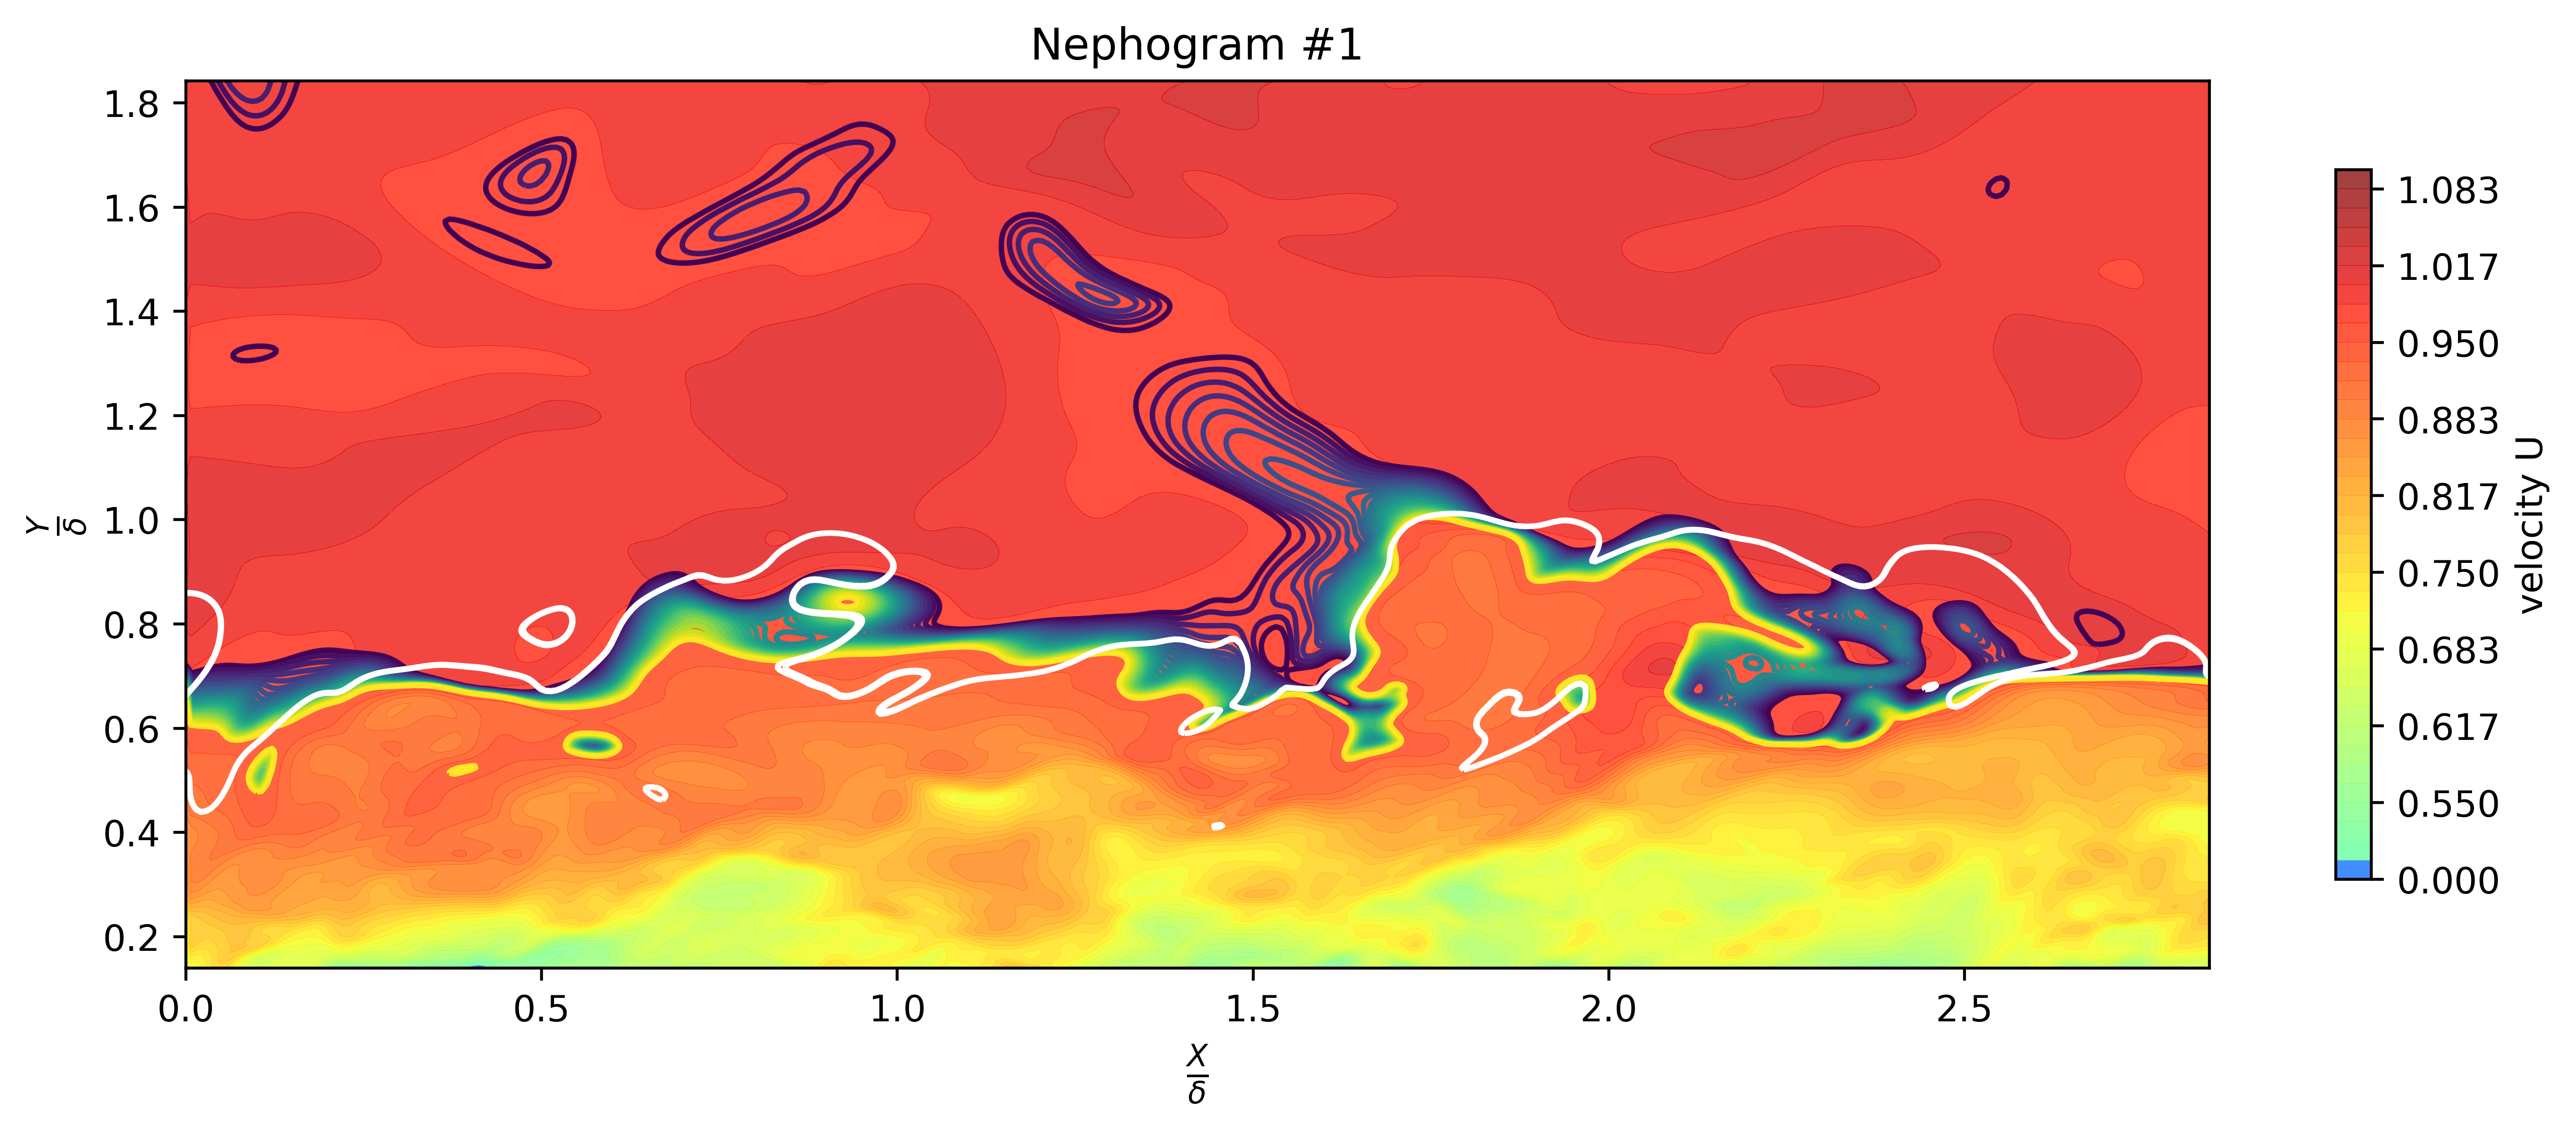

---End---


In [1]:
# # import libraries[ for windows system ]
# import sys 
# sys.path.append('E:\\Program Files\\Python37\\Lib\\site-packages')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl 
from scipy.interpolate import griddata 
from pylab import *
import time 

# --------------------------------
# read data from the original set 

path = '/home/jinyuan/dataB/Wu_BLayer/'
fname = path + 'restart_01013_ydelta_adrian_scalar_omega_uvw_08240_10565.dat'

f   = open (fname, mode = 'r')

out = open('/home/jinyuan/Dropbox/Projects/Wu_data_BLayer/output_figs/tnti_no_use.txt'
           , mode = 'a')

# --------------------------------
# choose the starting position 
# parameters 
# --------------------------------
jy = 1
rsl = 500 
binbin = 25

thre =[np.arange(0.039,0.040,0.001)][0]
# thre = 0.04 # Wu 2019 PoF ; for BTFTI 
tnti = [np.arange(0.08,0.33,0.01)][0]
# tnti = array([0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
# tnti = array([0,0.001,0.003,0.005,0.008,0.01,0.1,1])
# --------------------------------

nof = 1 ; # number of field of view 

stax = 1
stax = 1 + 440 * (jy-1) # [1,2326] + 440*(jy-1)
nox  = 440 * nof
skpx = 2326 - nox 
endx = stax + nox 

stay = 100   # [1,400] 
endy = 300  # 245,249,252,255,258
noy = endy - stay + 1

staz = 1     # Zlabel  #[1,513] which slide

# --------------------------------
# skip / go to certain index (I,J，K)
for i in range(3):
    data = f.readline()
    
for i in range(stax-1):
    data = f.readline()
    
for j in range(stay-1):
    for i in range(2326):
        data = f.readline()

for k in range(staz-1):
    for j in range(400):
        for i in range(2326):
            data = f.readline()
 
 # --------------------------------
 # get velocity 

xy    = [[],[]] # original grid
uv    = [[],[]] # original grid
scalar = []
lke   = []

small = 1e-15

for j in range(noy):
    for i in range(nox):
        data = f.readline()
        lst = data.split()
        x = float(lst[0]) - 10842.4
        y = float(lst[1])
        yod = float(lst[3])
        xod = x / (y+small) * yod
        u = float(lst[7])
        v = float(lst[8])
        sca = float(lst[5]) # scalar 

        kt = 100 * ((u-1) ** 2 + v ** 2) # Chuahan 2014 JFM 
        
        xy[0].append(xod)
        xy[1].append(yod)
        uv[0].append(u)
        uv[1].append(v)
        lke.append(kt) 
        scalar.append(sca)
        
    for i in range(skpx): # skip other x left 
        data = f.readline()
        
# input("Press Enter to continue...")
# print(scalar)

# --------------------------------
# interpolation        
xmax = xy[0][-1]
xmin = xy[0][0]
ymax = xy[1][-1]
ymin = xy[1][0]

interpx = 400
interpy = 400

xi=np.linspace(xmin,xmax,interpx)
yi=np.linspace(ymin,ymax,interpy)


XY  = np.meshgrid(xi,yi)

UU  = griddata((xy[0],xy[1]), uv[0], (XY[0],XY[1]), method =  'cubic')
VV  = griddata((xy[0],xy[1]), uv[1], (XY[0],XY[1]), method =  'cubic')
LKE = griddata((xy[0],xy[1]), lke, (XY[0],XY[1]), method =  'cubic')
SCA = griddata((xy[0],xy[1]), scalar, (XY[0],XY[1]), method =  'cubic')

# print(SCA)
# --------------------------------
# plot 
# print(UU)


rsl = 500
figure(num=1, figsize=(12.5 * nof, 4.5), dpi=rsl)
ext = array([0])
ext = np.append(ext,linspace(0.5,1.1,37))
im      = plt.contourf(XY[0],XY[1],UU,ext,alpha=0.75,cmap=plt.cm.jet)
isoline = plt.contour(XY[0],XY[1],LKE,tnti) # plot the isoline of Local Kinetic Energy #,linewidths = 5
isolines = plt.contour(XY[0],XY[1],SCA,thre,colors=['white','white']) # plot the BTFTI 
# plt.contour returns a QuadContourSet

lines = []
for line in isoline.collections[7].get_paths():
    lines.append(line.vertices)

# pj=isoline.collections[0].get_paths()
# pk=pj.vertices
px=lines[0][:, 0]
py=lines[0][:, 1]

print(len(px))

for i in range(len(px)):
    out.write('%s %s \n'%(px[i],py[i]))

# out.append('%f %f \n'%(px,py))

plt.xlabel("$\\frac{X}{\delta}$",fontdict={'family' : 'Calibri', 'size':12})
plt.ylabel("$\\frac{Y}{\delta}$",fontdict={'family' : 'Calibri', 'size':12})
#plt.clabel(isoline,inline=True,fontsize=10)

# legend
cbar=plt.colorbar(im, orientation='vertical', shrink=0.8)
cbar.set_label('velocity U')
# cbar.set_ticks(np.linspace(0,1,11)) 

plt.title('Nephogram #%d'%jy)
plt.savefig('/home/jinyuan/Dropbox/Projects/Wu_data_BLayer/output_figs/ \
vel_nephogram_at_Zlabel_%d_X#%d_tnti_btfti.svg'%(staz,jy), dpi=rsl, bbox_inches="tight")

plt.show()

# figure(num=2, figsize=(12.5 * nof, 4.5), dpi=rsl)
# fig2 = plt.scatter(px,py)
# figure(num=3, figsize=(12.5 * nof, 4.5), dpi=rsl)
# from kde import kde
# kde(py,12345,25,54321)

# --------------------------------
# end 

f.close()
out.close()

print ('---End---')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl 
from scipy.interpolate import griddata 
from pylab import *
import time 

# --------------------------------
# read data from the original set 
path = '/home/jinyuan/dataB/Wu_BLayer/'
fname = path + 'restart_01013_ydelta_adrian_scalar_omega_uvw_08240_10565.dat'
f   = open (fname, mode = 'r')
f.close()

NameError: name 'pwd' is not defined

In [3]:
pwd

'/home/jinyuan/Dropbox/Code/pycodes/Wu-data postprocessing'